In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [2]:
data_path="./data/IPL/"
game_data=pd.read_csv(data_path+"stats/game_table.csv")
match_data=pd.read_csv(data_path+"stats/game_stats.csv")
game_data.columns

c:\users\evolj\documents\github\cric_bet\venv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Unnamed: 0', 'match_id', 'season', 'start_date', 'venue', 'innings',
       'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'rain', 'balls_remain',
       'wickets_remain', 'rr', 'sr', 'sr_two', 'rrr', 'current_score',
       'e_r_career', 'Av_career', 's_r_career', 'extras_striker',
       'extras_bowler', 'games_striker', 'games_bowler', 'wicket_scored',
       'new_no_ball', 'w_b'],
      dtype='object')

Index(['Unnamed: 0', 'match_id', 'season', 'start_date', 'venue', 'innings',
       'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'rain', 'balls_remain',
       'wickets_remain', 'rr', 'sr', 'sr_two', 'rrr', 'current_score',
       'e_r_career', 'Av_career', 's_r_career', 'extras_striker',
       'extras_bowler', 'games_striker', 'games_bowler', 'wicket_scored',
       'new_no_ball', 'w_b'],
      dtype='object')


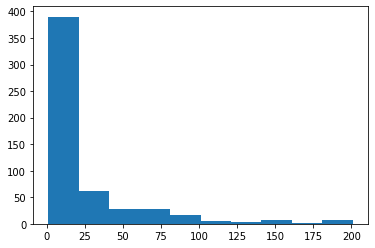

            striker  match_id
0    A Ashish Reddy        23
1        A Chandila         2
2          A Chopra         6
3       A Choudhary         3
4       A Dananjaya         1
..              ...       ...
542     YV Takawale        10
543   Yashpal Singh         4
544     Younis Khan         1
545    Yuvraj Singh       126
546          Z Khan        27

[547 rows x 2 columns]
             striker  match_id
7           A Mishra        54
24    AB de Villiers       162
26      AC Gilchrist        80
33        AD Russell        68
37          AJ Finch        85
..               ...       ...
516         V Sehwag       104
530          WP Saha        99
537  Y Venugopal Rao        52
540        YK Pathan       153
545     Yuvraj Singh       126

[80 rows x 2 columns]


In [3]:
print(game_data.columns)
g=game_data.groupby("striker")
g = g.agg({"match_id": "nunique"}).reset_index()
plt.hist(g.match_id)
plt.show()
print(g)
print(g[g.match_id>50])

Index(['Unnamed: 0', 'match_id', 'season', 'start_date', 'venue', 'innings',
       'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'rain', 'balls_remain',
       'wickets_remain', 'rr', 'sr', 'sr_two', 'rrr', 'current_score',
       'e_r_career', 'Av_career', 's_r_career', 'extras_striker',
       'extras_bowler', 'games_striker', 'games_bowler', 'wicket_scored',
       'new_no_ball', 'w_b'],
      dtype='object')


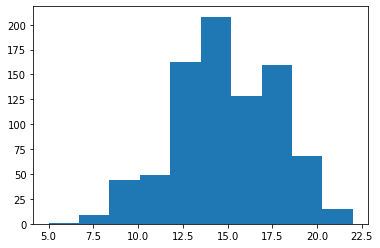

     match_id  striker
0      335982       16
1      335983       13
2      335984       13
3      335985       15
4      335986       17
..        ...      ...
840   1254082       13
841   1254083       17
842   1254084       13
843   1254085       15
844   1254086       13

[845 rows x 2 columns]


In [4]:
print(game_data.columns)
g=game_data.groupby("match_id")
g = g.agg({"striker": "nunique"}).reset_index()
plt.hist(g.striker)
plt.show()
print(g)

In [5]:
striker_positions=game_data.groupby(["match_id","batting_team"]).striker.unique()
bowler_positions=game_data.groupby(["match_id","batting_team"]).bowler.unique()

In [6]:
striker_position_sheet=pd.read_csv(data_path+"/stats/runs_player_stats.csv")
striker_position_sheet=pd.DataFrame(columns=striker_position_sheet.columns).drop(columns=["date"])
bowler_position_sheet=striker_position_sheet.copy()
striker_max_position_sheet=striker_position_sheet.copy()
bowler_max_position_sheet=bowler_position_sheet.copy()
inning_striker_sheet=striker_position_sheet.copy()
inning_bowler_sheet=striker_position_sheet.copy()
striker_position_sheet

,A Ashish Reddy,A Chandila,A Chopra,A Choudhary,A Dananjaya,A Flintoff,A Kumble,A Mishra,A Mithun,A Mukund,...,Y Venugopal Rao,YA Abdulla,YBK Jaiswal,YK Pathan,YS Chahal,YV Takawale,Yashpal Singh,Younis Khan,Yuvraj Singh,Z Khan


In [7]:
h=0
for i,j in zip(striker_positions.index,striker_positions):
    i=i[0]
    l=len(j)
    for p in j:
        pos=np.where(j==p)[0][0]
        striker_position_sheet.loc[i,p]=pos
        striker_max_position_sheet.loc[i,p]=l
        inning_striker_sheet.loc[i,p]=h+1
    h=(h+1)%2
h=0
for i,j in zip(bowler_positions.index,bowler_positions):
    i=i[0]
    l=len(j)
    for p in j:
        pos=np.where(j==p)[0][0]
        bowler_position_sheet.loc[i,p]=pos
        bowler_max_position_sheet.loc[i,p]=l
        inning_bowler_sheet.loc[i,p]=h+1
    h=(h+1)%2
print(striker_position_sheet)
striker_position_sheet.to_csv(data_path+"/stats/striker_position_player_stats.csv")
striker_max_position_sheet.to_csv(data_path+"/stats/striker_max_position_player_stats.csv")
inning_striker_sheet.to_csv(data_path+"/stats/striker_inning_player_stats.csv")
print(bowler_position_sheet)
bowler_position_sheet.to_csv(data_path+"/stats/bowler_position_player_stats.csv")
bowler_max_position_sheet.to_csv(data_path+"/stats/bowler_max_position_player_stats.csv")
inning_bowler_sheet.to_csv(data_path+"/stats/bowler_inning_player_stats.csv")

        A Ashish Reddy A Chandila A Chopra A Choudhary A Dananjaya A Flintoff  \
335982             NaN        NaN      NaN         NaN         NaN        NaN   
335983             NaN        NaN      NaN         NaN         NaN        NaN   
335984             NaN        NaN      NaN         NaN         NaN        NaN   
335985             NaN        NaN      NaN         NaN         NaN        NaN   
335986             NaN        NaN      NaN         NaN         NaN        NaN   
...                ...        ...      ...         ...         ...        ...   
1254082            NaN        NaN      NaN         NaN         NaN        NaN   
1254083            NaN        NaN      NaN         NaN         NaN        NaN   
1254084            NaN        NaN      NaN         NaN         NaN        NaN   
1254085            NaN        NaN      NaN         NaN         NaN        NaN   
1254086            NaN        NaN      NaN         NaN         NaN        NaN   

        A Kumble A Mishra A

In [8]:
runs_sheet=pd.read_csv(data_path+"/stats/runs_player_stats.csv")
balls_sheet=pd.read_csv(data_path+"/stats/balls_player_stats.csv")
dismissed_sheet=pd.read_csv(data_path+"/stats/dismissed_player_stats.csv")
concived_runs_sheet=pd.read_csv(data_path+"/stats/concived_runs_player_stats.csv")
balls_bowler_sheet=pd.read_csv(data_path+"/stats/balls_bowl_player_stats.csv")
extras_striker_sheet=pd.read_csv(data_path+"/stats/extras_striker_player_stats.csv")
extras_bowler_sheet=pd.read_csv(data_path+"/stats/extras_bowler_player_stats.csv")
positions_striker_sheet=pd.read_csv(data_path+"/stats/striker_position_player_stats.csv")
positions_bowler_sheet=pd.read_csv(data_path+"/stats/bowler_position_player_stats.csv")

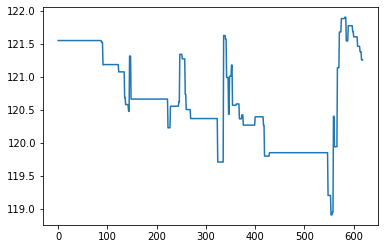

In [21]:
def career_strike_rate(player):
    strike_rates=[]
    for i in range(1,len(runs_sheet)):
        #if np.isnan(runs_sheet[player].iloc[i]):
        #   continue
        strike_rate=runs_sheet[player].iloc[:i].sum()/balls_sheet[player].iloc[:i].sum()*100
        strike_rates.append(strike_rate)
    plt.plot(strike_rates)
career_strike_rate("EJG Morgan")
plt.show()

In [22]:
striker_rate_sheet=runs_sheet.copy().drop(columns=["date"])
endurance_sheet=runs_sheet.copy().drop(columns=["date"])
games_played_sheet=balls_sheet.copy().drop(columns=["date"])>1
rs=runs_sheet.drop(columns=["date"])
bs=balls_sheet.drop(columns=["date"])
ds=dismissed_sheet.drop(columns=["date"])
for i in range(1,len(rs)):
    striker_rate_sheet.iloc[i]=(rs.iloc[:i].sum().values.astype(np.float)/bs.iloc[:i].sum().values.astype(np.float))*100
    endurance_sheet.iloc[i]=bs.iloc[:i].sum().values.astype(np.float)/ds.iloc[:i].sum().values.astype(np.float)
endurance_sheet.replace([np.inf, -np.inf], np.nan, inplace=True)
print(striker_rate_sheet)
print(endurance_sheet)
striker_rate_sheet.to_csv(data_path+"/stats/striker_rate_player_stats.csv")
endurance_sheet.to_csv(data_path+"/stats/striker_endurance_stats.csv")
#games_played_sheet.to_csv(data_path+"/stats/striker_games_played_stats.csv")

<ipython-input-22-941183b0afd3>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  striker_rate_sheet.iloc[i]=(rs.iloc[:i].sum().values.astype(np.float)/bs.iloc[:i].sum().values.astype(np.float))*100
<ipython-input-22-941183b0afd3>:8: RuntimeWarning: invalid value encountered in true_divide
  striker_rate_sheet.iloc[i]=(rs.iloc[:i].sum().values.astype(np.float)/bs.iloc[:i].sum().values.astype(np.float))*100
<ipython-input-22-941183b0afd3>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar typ

     A Ashish Reddy  A Chandila   A Chopra  A Choudhary  A Dananjaya  \
0        280.000000    4.000000  53.000000         25.0          4.0   
1        142.857143   57.142857  70.666667        125.0         80.0   
2        142.857143   57.142857  70.666667        125.0         80.0   
3        142.857143   57.142857  70.666667        125.0         80.0   
4        142.857143   57.142857  70.666667        125.0         80.0   
..              ...         ...        ...          ...          ...   
615      144.837758   57.142857  65.600000        125.0         80.0   
616      144.837758   57.142857  65.600000        125.0         80.0   
617      144.837758   57.142857  65.600000        125.0         80.0   
618      144.837758   57.142857  65.600000        125.0         80.0   
619      144.837758   57.142857  65.600000        125.0         80.0   

     A Flintoff   A Kumble    A Mishra    A Mithun   A Mukund  ...  \
0     62.000000  35.000000  362.000000   34.000000  19.000000  ..

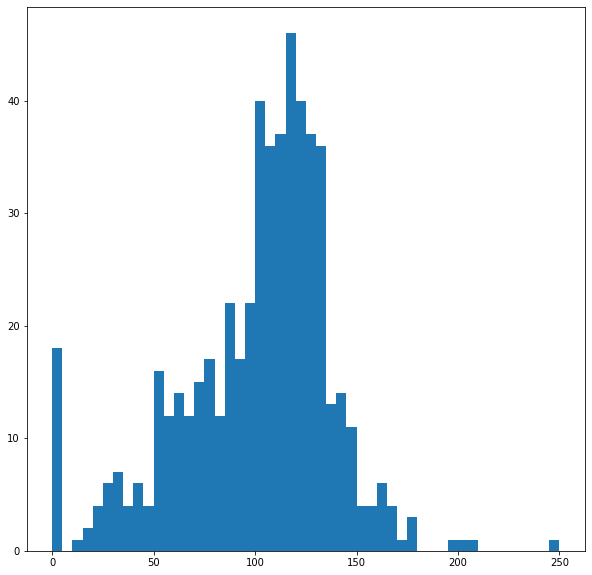

In [23]:
fig,ax=plt.subplots(figsize=(10,10))
plt.hist(striker_rate_sheet.iloc[-1],bins=50)
plt.show()

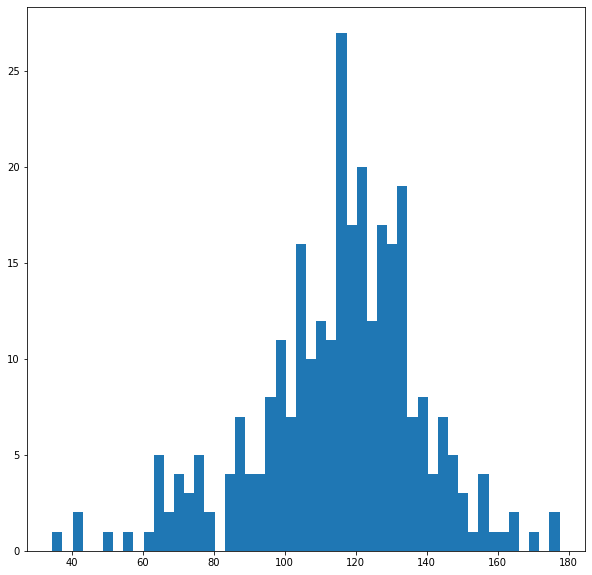

In [24]:
fig,ax=plt.subplots(figsize=(10,10))
indices=(games_played_sheet.sum()>5).values
plt.hist(striker_rate_sheet.iloc[-1][indices],bins=50)
plt.show()

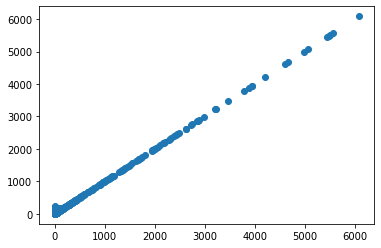

In [28]:
sr=striker_rate_sheet.values.flatten()
runs=rs.values.flatten()
plt.scatter(runs,sr)
plt.show()

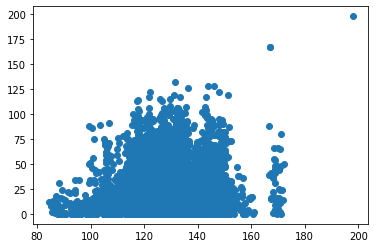

In [29]:
indices=(games_played_sheet.sum()>20).values
sr=striker_rate_sheet[striker_rate_sheet.columns[indices]].values.flatten()
srn=sr[sr<200]
runs=rs[striker_rate_sheet.columns[indices]].values.flatten()[sr<200]
plt.scatter(srn,runs)
plt.show()

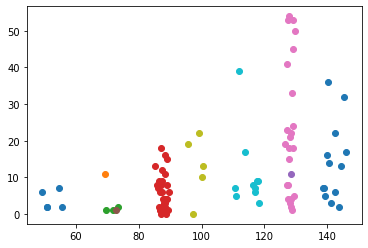

In [34]:
srs=[]
runss=[]
c=0
for p in striker_rate_sheet.columns:
    if games_played_sheet[p].sum()<5:
        continue
    sr=striker_rate_sheet[p][games_played_sheet[p]][4:-1]
    for i in sr:
        srs.append(i)
    runs=rs[p][games_played_sheet[p]][5:]
    for i in runs:
        runss.append(i)
    plt.scatter(sr,runs)
    c+=1
    if c>10:
        break
plt.show()

In [31]:
corr, _ = pearsonr(srs, runss)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(srs, runss)
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.170
Spearmans correlation: 0.153


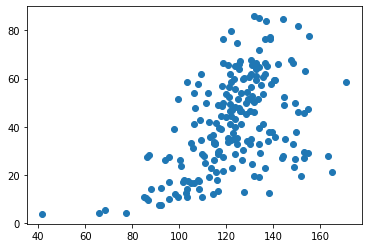

In [17]:
indices=(games_played_sheet.sum()>10).values
ps=striker_rate_sheet.columns[indices]
sr=striker_rate_sheet[ps].mean()
runs=rs[ps].mean()
plt.scatter(sr,runs)
plt.show()

In [18]:
corr, _ = pearsonr(sr, runs)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(sr, runs)
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.500
Spearmans correlation: 0.488


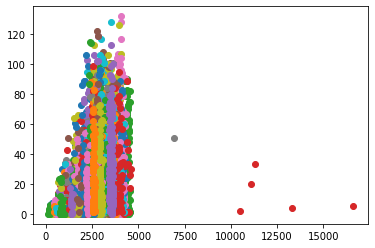

Pearsons correlation: 0.307
Spearmans correlation: 0.314


In [19]:
srs=[]
runss=[]
for p in striker_rate_sheet.columns:
    if games_played_sheet[p].sum()<5:
        continue
    sr=np.multiply(striker_rate_sheet[p][games_played_sheet[p]][4:-1].values,endurance_sheet[p][games_played_sheet[p]][4:-1].values)
    for i in sr:
        srs.append(i)
    runs=rs[p][games_played_sheet[p]][5:]
    for i in runs:
        runss.append(i)
    plt.scatter(sr,runs)
plt.show()
corr, _ = pearsonr(srs, runss)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(srs, runss)
print('Spearmans correlation: %.3f' % corr)

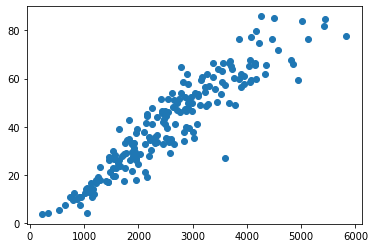

Pearsons correlation: 0.931
Spearmans correlation: 0.936


In [20]:
indices=(games_played_sheet.sum()>10).values
ps=striker_rate_sheet.columns[indices]
sr=striker_rate_sheet[ps].mean()*endurance_sheet[ps].mean()
runs=rs[ps].mean()
plt.scatter(sr,runs)
plt.show()
corr, _ = pearsonr(sr, runs)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(sr, runs)
print('Spearmans correlation: %.3f' % corr)